### **Description**:Learn how to use Convolutional Neural Network in Tensorflow

I used CIFAR-10 dataset to find the mileage of different vehicles.

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [10]:
# get the dataset
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_images.shape) # 50000, 32, 32, 3

(50000, 32, 32, 3)


In [11]:
#Normalize: 0, 255 -> 0, 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

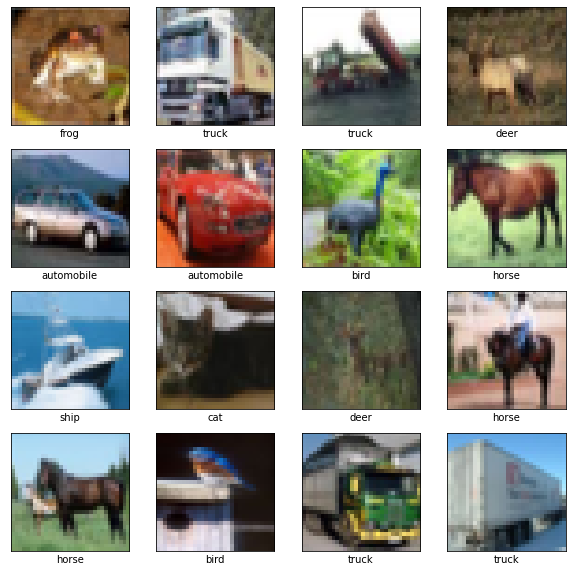

In [12]:
def show():
  plt.figure(figsize=(10, 10))
  for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
  plt.show()
show()

In [13]:
# model
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding="valid", activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                73792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [14]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [16]:
# training
batch_size = 64
epochs = 5
model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/5
782/782 - 42s - loss: 1.1021 - accuracy: 0.6132
Epoch 2/5
782/782 - 42s - loss: 1.0166 - accuracy: 0.6460
Epoch 3/5
782/782 - 42s - loss: 0.9538 - accuracy: 0.6683
Epoch 4/5
782/782 - 42s - loss: 0.9049 - accuracy: 0.6854
Epoch 5/5
782/782 - 42s - loss: 0.8592 - accuracy: 0.7004


In [17]:
# evaluate
model.evaluate(test_images, test_labels, batch_size=batch_size, verbose=2)

157/157 - 2s - loss: 0.9591 - accuracy: 0.6708


[0.9590759873390198, 0.670799970626831]